<h1><i>Package fanalysis</i></h1>
<h2>Analyse en Composantes Principales</h2>
<p>
Ce tutoriel a pour objectif de présenter rapidement les principales fonctionnalités offertes par le package <i>fanalysis</i> pour réaliser une Analyse en Composantes Principales.<br />
Il suppose connu les soubassements théoriques de cette méthode.<br />
Il ne s'attarde pas non plus sur l'interprétation du jeu de données, qui n'a pour but que de présenter les fonctionnalités du package.<br />
2 approches sont présentées :
<ul>
    <li>Une approche "datamining" : l'ACP vise à décrire un jeu de données</li>
    <li>Une approche "machine learning" : l'ACP est utilisée comme méthode de réduction des données, le résultat servant d'entrée pour un modèle prédictif (nous ferons ici l'usage d'outils de scikit-learn).</li>
</ul>
</p>



<h1>I. Approche Datamining</h1>
<p>
L'ACP a ici pour but de décrire un fichier de données.<br />
Celui-ci est extrait du site de Ricco Rakotomalala (Université Lyon 2) :<br />
http://eric.univ-lyon2.fr/%7Ericco/tanagra/fichiers/autos_acp.xls<br />
</p>
<p>
Nous partons d'un fichier texte intitulé "pca_data.txt".<br />
On importe la librairie pandas pour charger les données, ainsi que la classe PCA du package <i>fanalysis</i>.<br />
Les données sont transformées en matrice de type numpy.ndarray.
</p>
<p>
Les données doivent se présenter sous la forme d'une matrice de valeurs numériques.
</p>

In [5]:
import pandas as pd
from fanalysis.pca import PCA
%matplotlib inline

In [6]:
df = pd.read_table("pca_data.txt", header=0, index_col=0, delimiter="\t", encoding="utf-8")

FileNotFoundError: [Errno 2] No such file or directory: 'pca_data.txt'

In [ ]:
print(df)

                  CYL  PUISS  LONG  LARG  POIDS  V-MAX FINITION   PRIX  \
Modele                                                                   
Alfasud-TI       1350     79   393   161    870    165        B  30570   
Audi-100         1588     85   468   177   1110    160       TB  39990   
Simca-1300       1294     68   424   168   1050    152        M  29600   
Citroen-GS-Club  1222     59   412   161    930    151        M  28250   
Fiat-132         1585     98   439   164   1105    165        B  34900   
Lancia-Beta      1297     82   429   169   1080    160       TB  35480   
Peugeot-504      1796     79   449   169   1160    154        B  32300   
Renault-16-TL    1565     55   424   163   1010    140        B  32000   
Renault-30       2664    128   452   173   1320    180       TB  47700   
Toyota-Corolla   1166     55   399   157    815    140        M  26540   
Alfetta-1.66     1570    109   428   162   1060    175       TB  42395   
Princess-1800    1798     82   445   1

L'analyse va porter sur les 6 premières variables.

In [ ]:
X = df.iloc[:, 0:6].as_matrix()

<p>On crée une instance de la classe PCA, en lui passant ici des étiquettes pour les lignes et les variables. Ces paramètres sont facultatifs ; en leur absence, le programme détermine automatiquement des étiquettes.</p>
<p>Le constructeur de la classe PCA possède un paramètre <i>sdt_unit</i> qui indique si l'ACP est réalisée :
<ul>
    <li>à partir de données centrées et réduites -> PCA(std_unit=True)</li>
    <li>à partir de données centrées mais non réduites -> PCA(std_unit=False)</li>
</ul>
</p>
<p>Par défaut, la valeur du paramètre <i>std_unit</i> est fixée à True, car c'est le cas le plus courant.</p>

In [ ]:
my_pca = PCA(std_unit=True, row_labels=df.index.values, col_labels=df.columns.values[0:6])

On estime le modèle en appliquant la méthode <i>fit</i> de la classe PCA sur le jeu de données.

In [ ]:
my_pca.fit(X)

PCA(col_labels=array(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'V-MAX'], dtype=object),
  n_components=None,
  row_labels=array(['Alfasud-TI', 'Audi-100', 'Simca-1300', 'Citroen-GS-Club',
       'Fiat-132', 'Lancia-Beta', 'Peugeot-504', 'Renault-16-TL',
       'Renault-30', 'Toyota-Corolla', 'Alfetta-1.66', 'Princess-1800',
       'Datsun-200L', 'Taunus-2000', 'Rancho', 'Mazda-9295', 'Opel-Rekord',
       'Lada-1300'], dtype=object),
  stats=True, std_unit=True)

<p>
L'exécution de la méthode <i>my_pca.fit(X)</i> provoque a minima le calcul des attributs :
<ul>
    <li><i>my\_pca.eig\_</i> : valeurs propres</li>
    <li><i>my\_pca.row\_coord\_</i> : coordonnées des points lignes</li>
    <li><i>my\_pca.col\_coord\_</i> : coordonnées des points colonnes</li>
</ul>

<h3>I.1. Analyse des valeurs propres</h3>

L'attribut <i>my\_pca.eig\_</i> contient :
<ul>
    <li>en 1ère ligne : les valeurs propres en valeur absolue</li>
    <li>en 2ème ligne : les valeurs propres en pourcentage de la variance totale</li>
    <li>en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale</li>

</ul>

In [ ]:
print(my_pca.eig_)

[[  4.42085806e+00   8.56062289e-01   3.73066077e-01   2.13922089e-01
    9.28012120e-02   4.32902727e-02]
 [  7.36809677e+01   1.42677048e+01   6.21776796e+00   3.56536815e+00
    1.54668687e+00   7.21504545e-01]
 [  7.36809677e+01   8.79486725e+01   9.41664404e+01   9.77318086e+01
    9.92784955e+01   1.00000000e+02]]


Les valeurs propres peuvent être représentées graphiquement (par défaut : représentation en valeur absolue).

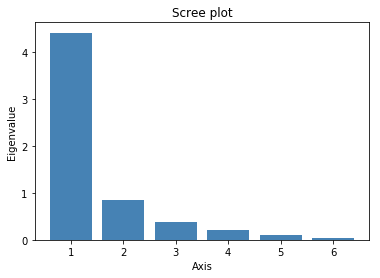

In [ ]:
my_pca.plot_eigenvalues()

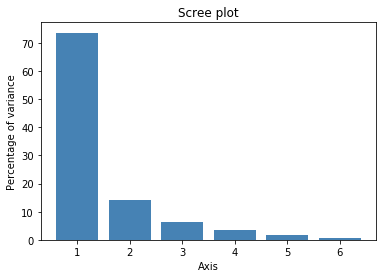

In [ ]:
my_pca.plot_eigenvalues(type="percentage")

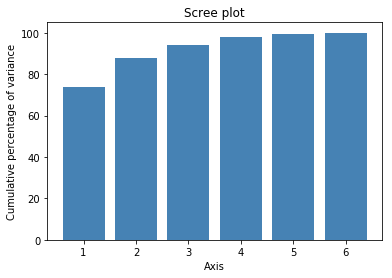

In [ ]:
my_pca.plot_eigenvalues(type="cumulative")

<p>Quand l'objet <i>my\_pca</i> a été instancié, son paramètre <i>stats</i> a reçu la valeur True par défaut.<br />
En conséquence, lors de l'exécution de la méthode <i>my\_pca.fit(X)</i>, les statistiques suivantes ont été calculées :
<ul>
    <li><i>my\_pca.row\_contrib\_</i> : contributions des points lignes à la variance de l'axe</li>
    <li><i>my\_pca.col\_contrib\_</i> : contributions des points colonnes à la variance de l'axe</li>
    <li><i>my\_pca.row\_cos2\_</i> : cosinus carrés des points lignes</li>
    <li><i>my\_pca.col\_cos2\_</i> : cosinus carrés des points colonnes</li>
</ul>
</p>
<p>
Si l'on avait souhaité éviter le calcul de ces statistiques pour gagner du temps et économiser des ressources mémoire, il  aurait fallu instancier :<br />
my\_pca = PCA(stats=False)
</p>
<p>
Par défaut, les coordonnées des points lignes et colonnes, leurs contributions et cosinus carrés sont calculés sur l'ensemble des axes extraits de l'analyse.<br />
On aurait toutefois pu spécifier le nombre d'axes à retenir via le paramètre <i>n_components</i> avec par exemple :<br />
my\_pca = PCA(n_components=3)
</p>


<h3>I.2. Extraction des statistiques sur les points lignes</h3>

<h5>Export de la totalité des données lignes vers une DataFrame pandas</h5>
<p>On peut simplement envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points <b>lignes</b>, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).</p>

In [ ]:
df_rows = my_pca.row_topandas()

In [ ]:
print(df_rows)

                 row_coord_dim1  row_coord_dim2  row_coord_dim3  \
Alfasud-TI            -2.138924       -1.785681       -0.571862   
Audi-100               1.561459        1.527040       -1.315271   
Simca-1300            -1.119385        0.674505       -0.456588   
Citroen-GS-Club       -2.573742       -0.112884       -0.148570   
Fiat-132               0.427855       -0.695567        0.193286   
Lancia-Beta           -0.304238        0.196149       -0.675803   
Peugeot-504            0.683928        0.933057        0.256823   
Renault-16-TL         -1.948493        0.980448        0.619575   
Renault-30             4.409735       -1.063633        0.593528   
Toyota-Corolla        -3.985782       -0.236240        0.303133   
Alfetta-1.66           0.437658       -1.912448       -0.024942   
Princess-1800          1.018175        0.841712       -0.216610   
Datsun-200L            2.941080        0.559175        1.243988   
Taunus-2000            1.314880       -0.486522       -0.28262

<h5>Statistiques pour les points lignes</h5>

In [ ]:
# Coordonnées des points lignes
print(my_pca.row_coord_)

[[-2.13892361 -1.78568102 -0.57186228 -0.20192734  0.30135696 -0.05392079]
 [ 1.56145859  1.52704027 -1.31527135  0.21135154 -0.14851614  0.32723844]
 [-1.11938528  0.67450517 -0.4565881   0.16762584  0.37536398 -0.27180323]
 [-2.5737417  -0.11288416 -0.1485698   0.01734322 -0.22685322 -0.26347623]
 [ 0.4278552  -0.69556731  0.19328567  0.62775448 -0.26350531  0.03715265]
 [-0.30423764  0.19614878 -0.67580317  0.55594137  0.44508594 -0.20008299]
 [ 0.6839285   0.93305677  0.25682308 -0.20313429 -0.20865165 -0.15389175]
 [-1.94849257  0.98044805  0.61957488 -0.63031916 -0.29316513 -0.10864179]
 [ 4.40973457 -1.06363317  0.59352842 -0.84724778  0.37488967 -0.04399657]
 [-3.98578242 -0.23624042  0.30313336 -0.2651218  -0.27842846  0.32889199]
 [ 0.43765819 -1.91244816 -0.02494224  0.75891042 -0.16810267  0.05424075]
 [ 1.01817538  0.8417121  -0.21661021 -0.30342642  0.18487578 -0.18489356]
 [ 2.94108031  0.55917459  1.24398816  0.77217107 -0.05441213  0.05726266]
 [ 1.31488038 -0.48652246

In [ ]:
# Contributions des points lignes
print(my_pca.row_contrib_)

[[  5.74925368e+00   2.06933067e+01   4.86995152e+00   1.05891748e+00
    5.43671170e+00   3.73121011e-01]
 [  3.06395135e+00   1.51329330e+01   2.57615777e+01   1.16006597e+00
    1.32044753e+00   1.37425014e+01]
 [  1.57463576e+00   2.95251897e+00   3.10449465e+00   7.29715894e-01
    8.43488263e+00   9.48083107e+00]
 [  8.32435980e+00   8.26966945e-02   3.28702335e-01   7.81144736e-03
    3.08080158e+00   8.90881743e+00]
 [  2.30045931e-01   3.13978898e+00   5.56341000e-01   1.02341437e+01
    4.15673736e+00   1.77140088e-01]
 [  1.16317973e-01   2.49685527e-01   6.80114726e+00   8.02656717e+00
    1.18593696e+01   5.13756719e+00]
 [  5.87817244e-01   5.64986748e+00   9.82222422e-01   1.07161394e+00
    2.60625852e+00   3.03926001e+00]
 [  4.77109902e+00   6.23837245e+00   5.71648851e+00   1.03179372e+01
    5.14515497e+00   1.51471535e+00]
 [  2.44368837e+01   7.34185620e+00   5.24595754e+00   1.86420105e+01
    8.41357929e+00   2.48413291e-01]
 [  1.99640247e+01   3.62185060e-01  

In [ ]:
# Cos2 des points lignes
print(my_pca.row_cos2_)

[[  5.56218430e-01   3.87670355e-01   3.97592085e-02   4.95729863e-03
    1.10412256e-02   3.53482045e-04]
 [  3.65334487e-01   3.49406285e-01   2.59215193e-01   6.69330406e-03
    3.30504237e-03   1.60456881e-02]
 [  5.80284267e-01   2.10694005e-01   9.65452233e-02   1.30125842e-02
    6.52509452e-02   3.42129754e-02]
 [  9.76991833e-01   1.87943381e-03   3.25553275e-03   4.43629747e-05
    7.59015938e-03   1.02386783e-02]
 [  1.56578785e-01   4.13825852e-01   3.19549851e-02   3.37069092e-01
    5.93906426e-02   1.18064401e-03]
 [  8.15547108e-02   3.38995857e-02   4.02405211e-01   2.72320999e-01
    1.74546405e-01   3.52730889e-02]
 [  3.09201727e-01   5.75488494e-01   4.36002142e-02   2.72763969e-02
    2.87782353e-02   1.56549323e-02]
 [  6.73539230e-01   1.70535407e-01   6.81009218e-02   7.04833286e-02
    1.52471967e-02   2.09391594e-03]
 [  8.92430696e-01   5.19198401e-02   1.61671191e-02   3.29435567e-02
    6.44995295e-03   8.88356440e-05]
 [  9.75219291e-01   3.42596966e-03  

<h3>I.3. Extraction des statistiques sur les points colonnes</h3>

<h5>Export de la totalité des données colonnes vers une DataFrame pandas</h5>
<p>On peut envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points <b>colonnes</b>, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).</p>

In [ ]:
df_cols = my_pca.col_topandas()

In [ ]:
print(df_cols)

       col_coord_dim1  col_coord_dim2  col_coord_dim3  col_coord_dim4  \
CYL          0.893464       -0.114906        0.215983       -0.373615   
PUISS        0.886858       -0.384689        0.112948        0.165485   
LONG         0.886155        0.381029       -0.041310        0.129390   
LARG         0.813536        0.412736       -0.369448       -0.097854   
POIDS        0.905187        0.224532        0.295865        0.139547   
V-MAX        0.754710       -0.573519       -0.296522        0.034029   

       col_coord_dim5  col_coord_dim6  col_contrib_dim1  col_contrib_dim2  \
CYL         -0.046176        0.012254         18.057062          1.542342   
PUISS        0.089481        0.131711         17.791052         17.286793   
LONG        -0.222555        0.039593         17.762847         16.959384   
LARG         0.145672        0.022797         14.970882         19.899361   
POIDS        0.092779       -0.120846         18.534057          5.889155   
V-MAX       -0.057471     

<h5>Statistiques pour les points colonnes</h5>

In [ ]:
# Coordonnées des points colonnes
print(my_pca.col_coord_)

[[ 0.89346354 -0.1149061   0.21598347 -0.37361508 -0.04617627  0.01225391]
 [ 0.88685803 -0.38468911  0.11294784  0.16548492  0.08948124  0.13171084]
 [ 0.88615477  0.38102873 -0.04131023  0.12939024 -0.22255537  0.03959265]
 [ 0.81353638  0.4127359  -0.36944822 -0.09785447  0.14567244  0.0227967 ]
 [ 0.90518746  0.22453248  0.29586489  0.13954667  0.09277852 -0.12084561]
 [ 0.75471037 -0.57351941 -0.29652226  0.03402937 -0.05747056 -0.09540146]]


In [ ]:
# Contributions des points colonnes
print(my_pca.col_contrib_)

[[ 18.05706238   1.54234244  12.5041811   65.25189946   2.29765048
    0.34686413]
 [ 17.79105239  17.28679283   3.41955892  12.80151078   8.62800446
   40.07308063]
 [ 17.76284733  16.9593841    0.45743502   7.82613573  53.37311127
    3.62108655]
 [ 14.97088197  19.89936113  36.58654406   4.47616152  22.86657532
    1.200476  ]
 [ 18.5340567    5.88915509  23.46394929   9.10297473   9.27558333
   33.73428086]
 [ 12.88409923  38.42296441  23.56833162   0.54131778   3.55907514
   21.02421182]]


In [ ]:
# Cos2 des points colonnes
print(my_pca.col_cos2_)

[[  7.98277098e-01   1.32034120e-02   4.66488579e-02   1.39588226e-01
    2.13224749e-03   1.50158429e-04]
 [  7.86517173e-01   1.47985714e-01   1.27572143e-02   2.73852593e-02
    8.00689271e-03   1.73477459e-02]
 [  7.85270268e-01   1.45182892e-01   1.70653488e-03   1.67418330e-02
    4.95308941e-02   1.56757824e-03]
 [  6.61841442e-01   1.70350926e-01   1.36491985e-01   9.57549824e-03
    2.12204590e-02   5.19689336e-04]
 [  8.19364339e-01   5.04148359e-02   8.75360352e-02   1.94732737e-02
    8.60785375e-03   1.46036622e-02]
 [  5.69587739e-01   3.28924509e-01   8.79254503e-02   1.15799831e-03
    3.30286486e-03   9.10143863e-03]]


<h3>I.4. Graphiques</h3>

<p>
3 types de graphiques peuvent être réalisés :
<ul>
    <li>Le cercle des corrélations</li>
    <li>Le mapping des point lignes</li>
    <li>Des graphiques qui permettent d'interpréter rapidement les axes : on choisit un axe factoriel (le 1er axe dans notre exemple) et on observe quels sont les points lignes et colonnes qui présentent les plus fortes contributions et cos2 pour cet axe</li>
</ul>
</p>
<h5>Graphiques factoriels</h5>

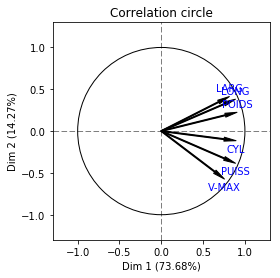

In [ ]:
# Cercle des corrélations
# Les paramètres de la méthode correlation circle indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2)

In [4]:
# Mapping des points lignes
my_pca.mapping_row(num_x_axis=1, num_y_axis=2)

NameError: name 'my_pca' is not defined

<h5>Analyse du 1er axe - Points lignes</h5>

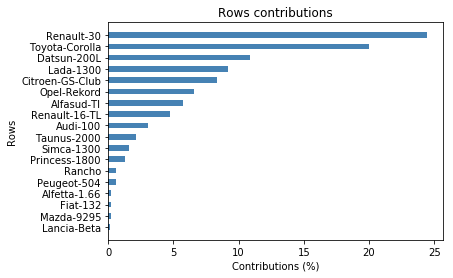

In [23]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_pca.plot_row_contrib(num_axis=1)

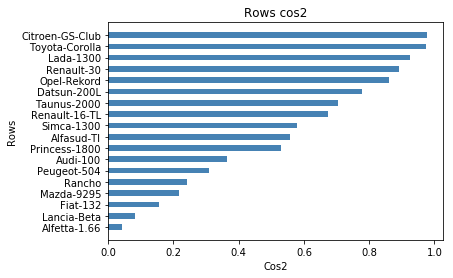

In [24]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_pca.plot_row_cos2(num_axis=1)

<h5>Analyse du 1er axe - Points colonnes</h5>

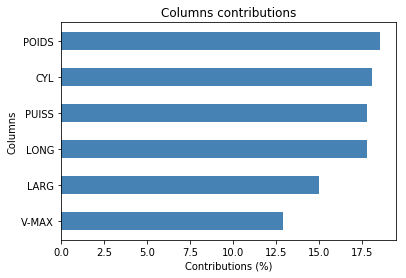

In [25]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_pca.plot_col_contrib(num_axis=1)

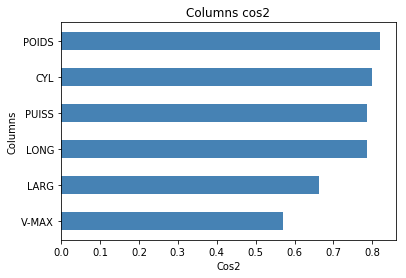

In [26]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_pca.plot_col_cos2(num_axis=1)

Pour ces graphiques produits par les méthodes <i>plot_row_contrib</i>, <i>plot_row_cos2</i>, <i>plot_col_contrib</i>, <i>plot_col_cos2</i>, on peut se limiter à visualiser les x valeurs les plus grandes via le paramètre nb_values.

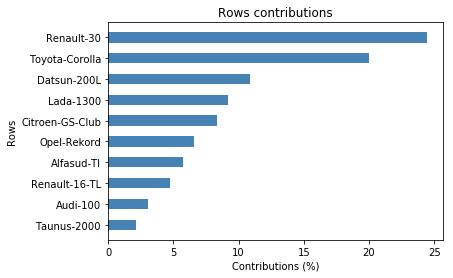

In [27]:
my_pca.plot_row_contrib(num_axis=1, nb_values=10)

Pour tous les graphiques présentés plus haut, il est possible de définir un taille particulière via le paramètre <i>figsize</i>.

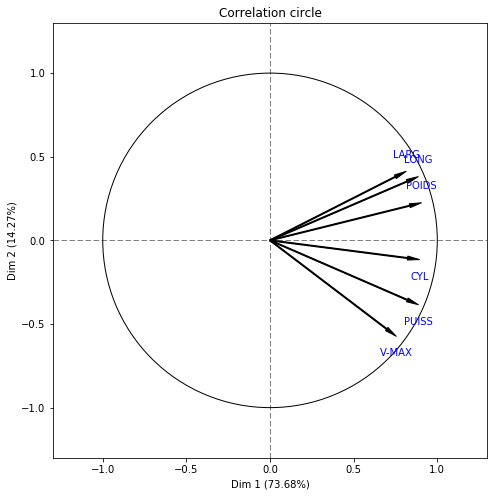

In [28]:
my_pca.correlation_circle(1, 2, figsize=(10, 8))

<h1>II. Approche Machine Learning</h1>
<p>
Ici, l'objectif est d'utiliser l'Analyse en Composantes Principales en tant que méthode de prétraitement.
</p>
<p>
La classe PCA implémente les méthodes <i>fit</i>, <i>transform</i> et <i>fit_transform</i> bien connues des utilisateurs de scikit-learn.
</p>
<p>
Il est ici judicieux de fixer le paramètre <i>stats</i> à <i>False</i> pour gagner en temps de traitement et en ressources mémoire.
</p>

In [29]:
my_pca = PCA(stats=False)

In [30]:
my_pca.fit(X)

PCA(col_labels=None, n_components=None, row_labels=None, stats=False,
  std_unit=True)

In [31]:
my_pca.transform(X)

array([[-2.13892361, -1.78568102, -0.57186228, -0.20192734,  0.30135696,
        -0.05392079],
       [ 1.56145859,  1.52704027, -1.31527135,  0.21135154, -0.14851614,
         0.32723844],
       [-1.11938528,  0.67450517, -0.4565881 ,  0.16762584,  0.37536398,
        -0.27180323],
       [-2.5737417 , -0.11288416, -0.1485698 ,  0.01734322, -0.22685322,
        -0.26347623],
       [ 0.4278552 , -0.69556731,  0.19328567,  0.62775448, -0.26350531,
         0.03715265],
       [-0.30423764,  0.19614878, -0.67580317,  0.55594137,  0.44508594,
        -0.20008299],
       [ 0.6839285 ,  0.93305677,  0.25682308, -0.20313429, -0.20865165,
        -0.15389175],
       [-1.94849257,  0.98044805,  0.61957488, -0.63031916, -0.29316513,
        -0.10864179],
       [ 4.40973457, -1.06363317,  0.59352842, -0.84724778,  0.37488967,
        -0.04399657],
       [-3.98578242, -0.23624042,  0.30313336, -0.2651218 , -0.27842846,
         0.32889199],
       [ 0.43765819, -1.91244816, -0.02494224,  0.

In [32]:
my_pca.fit_transform(X)

array([[-2.13892361, -1.78568102, -0.57186228, -0.20192734,  0.30135696,
        -0.05392079],
       [ 1.56145859,  1.52704027, -1.31527135,  0.21135154, -0.14851614,
         0.32723844],
       [-1.11938528,  0.67450517, -0.4565881 ,  0.16762584,  0.37536398,
        -0.27180323],
       [-2.5737417 , -0.11288416, -0.1485698 ,  0.01734322, -0.22685322,
        -0.26347623],
       [ 0.4278552 , -0.69556731,  0.19328567,  0.62775448, -0.26350531,
         0.03715265],
       [-0.30423764,  0.19614878, -0.67580317,  0.55594137,  0.44508594,
        -0.20008299],
       [ 0.6839285 ,  0.93305677,  0.25682308, -0.20313429, -0.20865165,
        -0.15389175],
       [-1.94849257,  0.98044805,  0.61957488, -0.63031916, -0.29316513,
        -0.10864179],
       [ 4.40973457, -1.06363317,  0.59352842, -0.84724778,  0.37488967,
        -0.04399657],
       [-3.98578242, -0.23624042,  0.30313336, -0.2651218 , -0.27842846,
         0.32889199],
       [ 0.43765819, -1.91244816, -0.02494224,  0.

<h5>Intégration dans une Pipeline de scikit-learn</h5>

La class PCA peut être intégrée dans une Pipeline de scikit-learn.<br />
Dans le cadre de notre exemple, nous cherchons à prédire la 8ème variable (variable <i>PRIX</i>) à partir des 6 premières variables du jeu de données.<br />
<i>PRIX</i> est une variable quantitative.<br />
Pour la prédire, nous allons utiliser un modèle de régression linéaire multiple, qui prendra en input des axes issus d'une Analyse en Composantes Principales pratiquée sur les données brutes.<br />
Dans un premier temps, et de façon tout à fait arbitraire, nous fixons le nombre de composantes extraites à 4. 

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

In [34]:
df = pd.read_table("pca_data.txt", header=0, index_col=0, delimiter="\t", encoding="utf-8")

In [35]:
# X = features
X = df.iloc[:, 0:6].as_matrix()
# y = labels
y = df.iloc[:, 7].as_matrix()

In [36]:
# Construction de la Pipeline
# On enchaine une Analyse en Composantes Prnicipales (4 axes retenus) puis une régression linéaire multiple
pipe = Pipeline([("pca", PCA(n_components=4, stats=False)), ("linear_regression", LinearRegression())])

In [37]:
# Estimation du modèle
pipe.fit(X, y)

Pipeline(steps=[('pca', PCA(col_labels=None, n_components=4, row_labels=None, stats=False,
  std_unit=True)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [38]:
# Prédiction sur l'échantillon de test
print(pipe.predict(X))

[ 28778.47166651  35726.0600918   31011.95297996  28033.41003637
  37806.88571481  34114.82070564  34931.02152346  27901.90893024
  43330.89903245  24545.70725329  38661.65482425  34794.41267099
  44874.06372338  35323.75414906  33995.01296845  35061.73868418
  37741.70392817  28221.52111698]


Le paramètre <i>n_components</i> peut faire l'objet d'une optimisation via GridSearchCV de scikit-learn.<br />
Nous reconstruisons donc une Pipeline, sans spécifier de valeur a priori pour <i>n_components</i>.

In [39]:
# Reconstruction d'une Pipeline, sans spécifier de valeur a priori pour n_components
pipe2 = Pipeline([("pca", PCA(stats=False)), ("linear_regression", LinearRegression())])

In [40]:
# Paramétrage de la grille de paramètres
# Attention à l'étendue des valeurs possibles pour mca__n_components !!!
param = [{"pca__n_components": [x + 1 for x in range(6)]}]

In [41]:
# Construction de l'obet GridSearchCV
grid_search = GridSearchCV(pipe2, param_grid=param, scoring="neg_mean_squared_error")

In [42]:
# Estimation du modèle
grid_search.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(col_labels=None, n_components=None, row_labels=None, stats=False,
  std_unit=True)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'pca__n_components': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [43]:
# Affichage du score optimal
grid_search.best_score_

-18610346.08613852

In [44]:
# Affichage du RMSE optimal
print(np.sqrt(-grid_search.best_score_))

4313.97103446


In [45]:
# Affichage du paramètre optimal
grid_search.best_params_

{'pca__n_components': 1}

In [46]:
# Prédiction sur l'échantillon de test
grid_search.predict(X)

array([ 29139.98988976,  37822.30866848,  31532.16353147,  28119.76302732,
        35162.50072319,  33444.76911431,  35763.33324829,  29586.80401162,
        44505.30484225,  24806.64915211,  35185.50176092,  36547.58683567,
        41059.35689487,  37243.75476268,  32537.03557754,  35063.61150171,
        39531.16366344,  27803.40279437])